In [ ]:

1.reqeust请求对象
    # 1. 请求方式: 增POST  删DELETE  改PUT  查GET 
    
    # 1. 前端传参的4种方式:
        1. 路径传参       /en/zh/RMB
        2. 查询参数       ?username=32323
        3. 请求体参数  3.1 表单传参form --
                     3.2 非表单传参---json={''},html,js,css,txt,xml
        4. 请求头参数 

    # 2,解析参数:                                        解析
        1. 路径传参       /en/zh/RMB                     正则
        2. 查询参数       ?username=32323                request.GET(属性)--querDict(一键多值)--get() getlist()
        3. 请求体参数  3.1 表单传参form --                 request.POST(属性)
                     3.2 非表单传参---json                request.body==>bybtes--decode--json.loads

        4. 请求头参数                                    reqeust.META==>Dict

    # 了解知道认识 其他属性
    # method  请求方式
    # path    路由
    # user    当前用户
    # encoding 编码格式--None==utf8

2.cookie的操作
    # 1.作用:
          保持会话状态
          缓存
    # 2.缺点:
        1.不太安全, 不建议敏感信息
        2.长度限制
    
    # 3.cookie的交互流程: 
        # 1. 前端--发请求 --登录
        # 2. 后台-->标识cookie-->浏览器自动存上
        # 3. 前端--二次--浏览器自动携带cookie-->后台

    # 1. 设置cookie  --->reponse.set_cookie(k,v,max_age)
    # 2. 读取cookie  --->request.COOKIES
    # 3. 删除cookie  --->response.delete_cookie(k)

3. session--存储位置--服务器
    # 1.作用:
        保持会话状态
        缓存
    
    # 2.优点--cookie
        1.安全
        2.长度没限制
    
    # 3.缺点:
        1. 依赖于cookie 使用
        2. session共享  

    # 要求: 能够描述cookie和session的区别

    session:存储方式
    # 1.cache
    # 2.db
    # 3.cache_db

    #4. 使用redis缓存 存储

    session--使用redis--配置
    # 1.pip install django-redis
    # 2.settings.py--设置 redis IP:poirt db=1

    session操作:
        # 1. 设置session  request.session['k'] =v
                         request.session.set_expiry(秒)
        # 2. 读取session  request.session['k'] 
        # 3. 删除session-整条  request.session.flush()

        # 4. 删除 指定的 session k --del request.session['k']
        # 5. 删除 所有的 session K -- request.session.clear()


4.类视图
    4.0 类视图的优势
       def index(request):
           retrun response
        # 1.易扩展
        # 2.阅读性高; -自动判断请求方式

    4.1 类视图的定义
        from django.views import View
        class LoginView(View):
            def get(self,request):
                return response
        urls.py -- url(r'^/$',views.LoginView.as_view())


    4.2 类视图as_view()原理
        # 1.作用: 将类视图的对象方法装换出来(自动判断 请求方式 返回对应的函数)
        # LoginView.as_view()
        # 2.login = LoginView()
        # 3. 判断依据---(request.method)  if else() ==>getattr(login,request.method)
        # 4. 返回对应的函数
        
    
    4.3 添加装饰器给类视图:
        # 装饰器本质:函数嵌套函数
        # 1.urls 
                1.定义了装饰器
                2.urls.py ---my_decorator(views.LoginView.as_view())

        # 2.django自带的
            @method_decorator(my_decorator,name="dispatch")
            class 
            @method_decorator(my_decorator
            def 

        # 3.Mixin扩展类--多继承
            class AMixin(object):
                name = "张三"
            class CMixin(object):
                age = 18
            class B(AMixin,CMixin):
                pass
        

2.中间件 middleware--==>装饰器
        # 中间件的作用: 10000个API---(校验IP)--装饰器10000次--扩展类 继承10000次
                      加一次中间件 可以对 项目中所有API 添加额外的功能
        # 1.场景: 1.校验IP 防止网络攻击 2. 判断登录: 3.统一处理返回的数据


        # 操作:
            1.middleware.py 
            2.注册 告诉django项目 启用自己写的中间件

        # 中间件执行顺序:
            处理请求对象之前---从上到下
            处理请求对象之后---从下到上



   




    # 1. request 4种参数解析

        # 1.请求头              request.META
        # 2.url路径传参          正则解析
        # 3.请求体          1.form ----request.POST ==>queryDict
                           2.json-----request.body ==>bytes
        # 4.查询参数?name=  3. request.GET==> queryDict 

        # method path user encoding
        # POST  Delete put get


    # 2. cookie 不太安全 --标识
    # 和session

    # 1.去食堂吃饭--卡--点菜---刷卡-- 

    # 2.KFC--交钱--小票998 cookie ---叫号---🍔
   

In [ ]:

1.类视图
    4.0 类视图的优势
        # 1. register页面 register注册功能  一个路由
        # 2. def index(request):
                if reqeust.method == "GET":
                    register页面
                else 
                    register注册功能

        # 优势: 1.自动判断 ,阅读性高 2.易扩展

    4.1 类视图的定义
        from django.views import View 
        class RegisterView(View):
            def 请求方式(self,request):
                return 
        
        url(r'^classview/$',views.RegisterView.as_view())


    4.2 类视图as_view()原理
        # 1.as_view() 作用:  RegisterView.as_view(cls) 类视图--->对象方法视图函数(判断 if else)
        # 1. register = RegisterView()  register = cls()
        # 2. 根据(request.method 请求方式)判断 返回 对应的视图函数 ==> getattr(register,reqest.method)
            # if  request.method === 'get': return self.get
    
    4.3 添加装饰器给类视图
        # 装饰器的本质是: 函数嵌套函数
        4.3.1 urls.py
            1.装饰器
            2. urls  my_decorator(views.RegisterView.as_view())

        4.3.2 @method_decorator
        ValueError: The keyword argument `name` must be the name of a method of the decorated class: <class 'dclassview.views.RegisterView'>. Got '' instead
        原因是:@method_decorator 里面有个参数 name 不能为空, 必须是请求方式
        
             # 1.from django.decorators import method_decorator
             # 2. @mehod_dcorator(自己的装饰器,name="dispatch") 给所有函数加装饰器
                  classs XX(View)

        4.3.3 Mixin 扩展类: 扩展性高于 装饰器
              # 1.扩展新功能
              # 2.类继承 ---多继承(A,B) 亲爹不行 找干爹
              class XXMixin(object):
                  name= "123"
                  def eat():

2.中间件 middleware-->装饰器
    # 1.添加额外的功能 装饰器添加 扩展类添加 
    # 1.作用: 可以在处理请求对象之前 或者  请求对象之后 ---给所有API we'b接口添加额外的功能
    #  场景: 1. 限流,限制IP 2.判断登录状态

    # 代码:
      # 1. 在项目中 middleware.py文件--- 定义一个装饰器
      # 2. settings.py 告诉django项目--加载我们自定义的中间件

    # 多中间件的 执行顺序:在处理请求对象之前 从上到下
                       在处理请求对象之后 从下到上


3.模板 template
    # 1.django自带模板
    # 1.配置 
        1 . 创建模板文件夹 templates
        2. settings.py ---- TEMPLATE= ['DIRS':[os.path.join(BASE_DIR,"templates")]]
        3. templates--创建 index.html文件
        3. 验证下, return render(request,'index.html')
    
    # 2.模板语法:
        1. 模板变量 : {{ }}
        2. for : {% for data in data_list %} {{ forloop.counter0 }}  {%empty%} {% endfor %}
        3. 条件语句: {% if score > 88 %} {% elif score > 88 %}  {% else %} {% endif%}
            注意点:  符号左右两边 必须加 空格


        不支持 data_list[0]
        Could not parse the remainder: '[0]' from 'data_list[0]'


        ## 2. 过滤器  变量|过滤器:参数
            1. 自带的过滤器: length default date:"Y-m-d"  safe(不想看见数据中的标签)
            2. 自定义过滤器: 代码一遍 7步
                    1.子应用appp目录--新建包 templatetags--xx.py
                    2. xx.py -- 导包 from django import template 
                    3. register = template.Library()
                    4. def abc(x): return x/2
                    5. 关联django @register.filter
                    6. index.html -- {% load xx %}
                    7. index.html {{ data|abc }}

            # 认识错 1.确认7步没问题 重启服务 2.子应用注册过的
            'multi' is not a registered tag library. Must be one of:

        ## 3. 模板继承
            {{block.super}}
            jinja2---super()
    # 2.jinja2模板
        1.配置
          1. pip install jinjia2
          2. 创建jinja2的环境
          3. settings.py 配置

        2.语法:
            1. {{ }}  list,dict支持[]
            2. for循环 loop.index0 == forloop.counter0 {%else%} == {% empty%}
            3. 自定义过滤器 2步


4. Django中配置mysql数据库

     1.pip install 






   今日的天空格外蓝

	如果有时间花个10-15分钟小讲一下python和前端的断点的使用。

	现在已经一讲代码就晕，
    讲概念讲流程还能理解，
    代码写不出来，写了也不认识，规矩框框太多，有没有什么技巧？ 没有 勤能补拙
    Django框架 --自己的规矩 

	学的东西太散。不会连贯。好的时候只知其然，
    不知其所以然。

    不好的时候。连其然是谁也不知道。而且有的地方前面没听懂，后面就直接和太阳肩并肩了。

    需要老师给梳理一下流程。告诉以后干什么用的，接一丢丢地气。
    比如今天学碗。用泥捏，具体烧制过程讲完了。告诉一下以后是讨饭用的。在下雨的时候可以当帽子。。。。。。
     
     有的地方给用框框和线条画个流程图。第一步实现了。。。第二步。。。十分直观好理解。。。

	session存储的数据库是自动创建不需要我们管吗？ redis存储  16个数据库 0

    四种请求方式很模糊呀，我相信大多数同学跟我是一样的，
    增删改查 功能---post delete put get
    一个路由实现两个功能 判断条件是什么: get post 请求方式 不一样

    今天下午加上明天再看看，可以再大致的过一下吗老师？
    特别是表单请求体传参 form标签 有 就是 表单参数
    和非表单请求体传参。  非表单 json string text html js ""
     其他的感觉都挺好懂的。就是需要记忆一下就好了

能够使用配置文件修改项目配置  
BASE_DIR  
DEBUG = True 开发测试环境
本地化 zh-hans Asia/ShangHai

能够说出路由匹配的规则 
urlpatterns = [

]

能够使用路由命名实现reverse反解析  
1 namespace= ""
2 name = ""
3 reverse('namespace:name')

反向解析优势  出错少, 易扩展 -->redirect()

能够知道操作设置静态文件   
1 settings.py 路由 STATIC_URL = '/static/'
2  文件夹路径 STATICFILES_DIRS = [os.path.join(BAESE_DIR,'文件夹名字')]

能够说出客户端给服务器传参的几种途径 4种
1.路径    /login/a/b/  正则自动匹配  ?P<name>
2.查询参数 ?a=10&b=20       request.GET ==>queryDict  支持一键多值 getlist() get()和 dict 
3.请求头                    request.META 
4.请求体                    request.POST -->表单
                            reqeust.body ==>非表单 json

能够使用正则提取URL路径参数 
能够提取URL查询参数 
能够提取请求体数据   
能够提取请求头数据   
能够知道其他常用请求对象属性  
request.path
user
encoding ==None 
method 

能够使用HttpResponse构造响应数据  
HttpResponse('hellow ',content_type status)
content status_code

JsonResponse()
# 1. dict/list== json_str
# 2. content_type = application/json

能够说出cookie的作用和特点    
能够使用cookie设置和读取数据  
    response.set_cookie
    request.COOKIES
    delete_cookie
能够说出session的作用和特点   
能够使用session设置和读取数据

    request.session['k'] = v 
    request.session['k'] 

    del request.session['k'] 

             作用                    缺点                存储位置
cookie      缓存,保持会话状态          4KB,不太安全         浏览器

session     缓存,保持会话状态          长度不限,安全        服务器(Django 交互数据库)


麦当劳   付钱 --前台--小票998号 cookie---汉堡包

食堂吃饭  有饭卡  饭卡丢了能挂失(卡--seesionID )  手机号多少, 叫什么, 身份证号

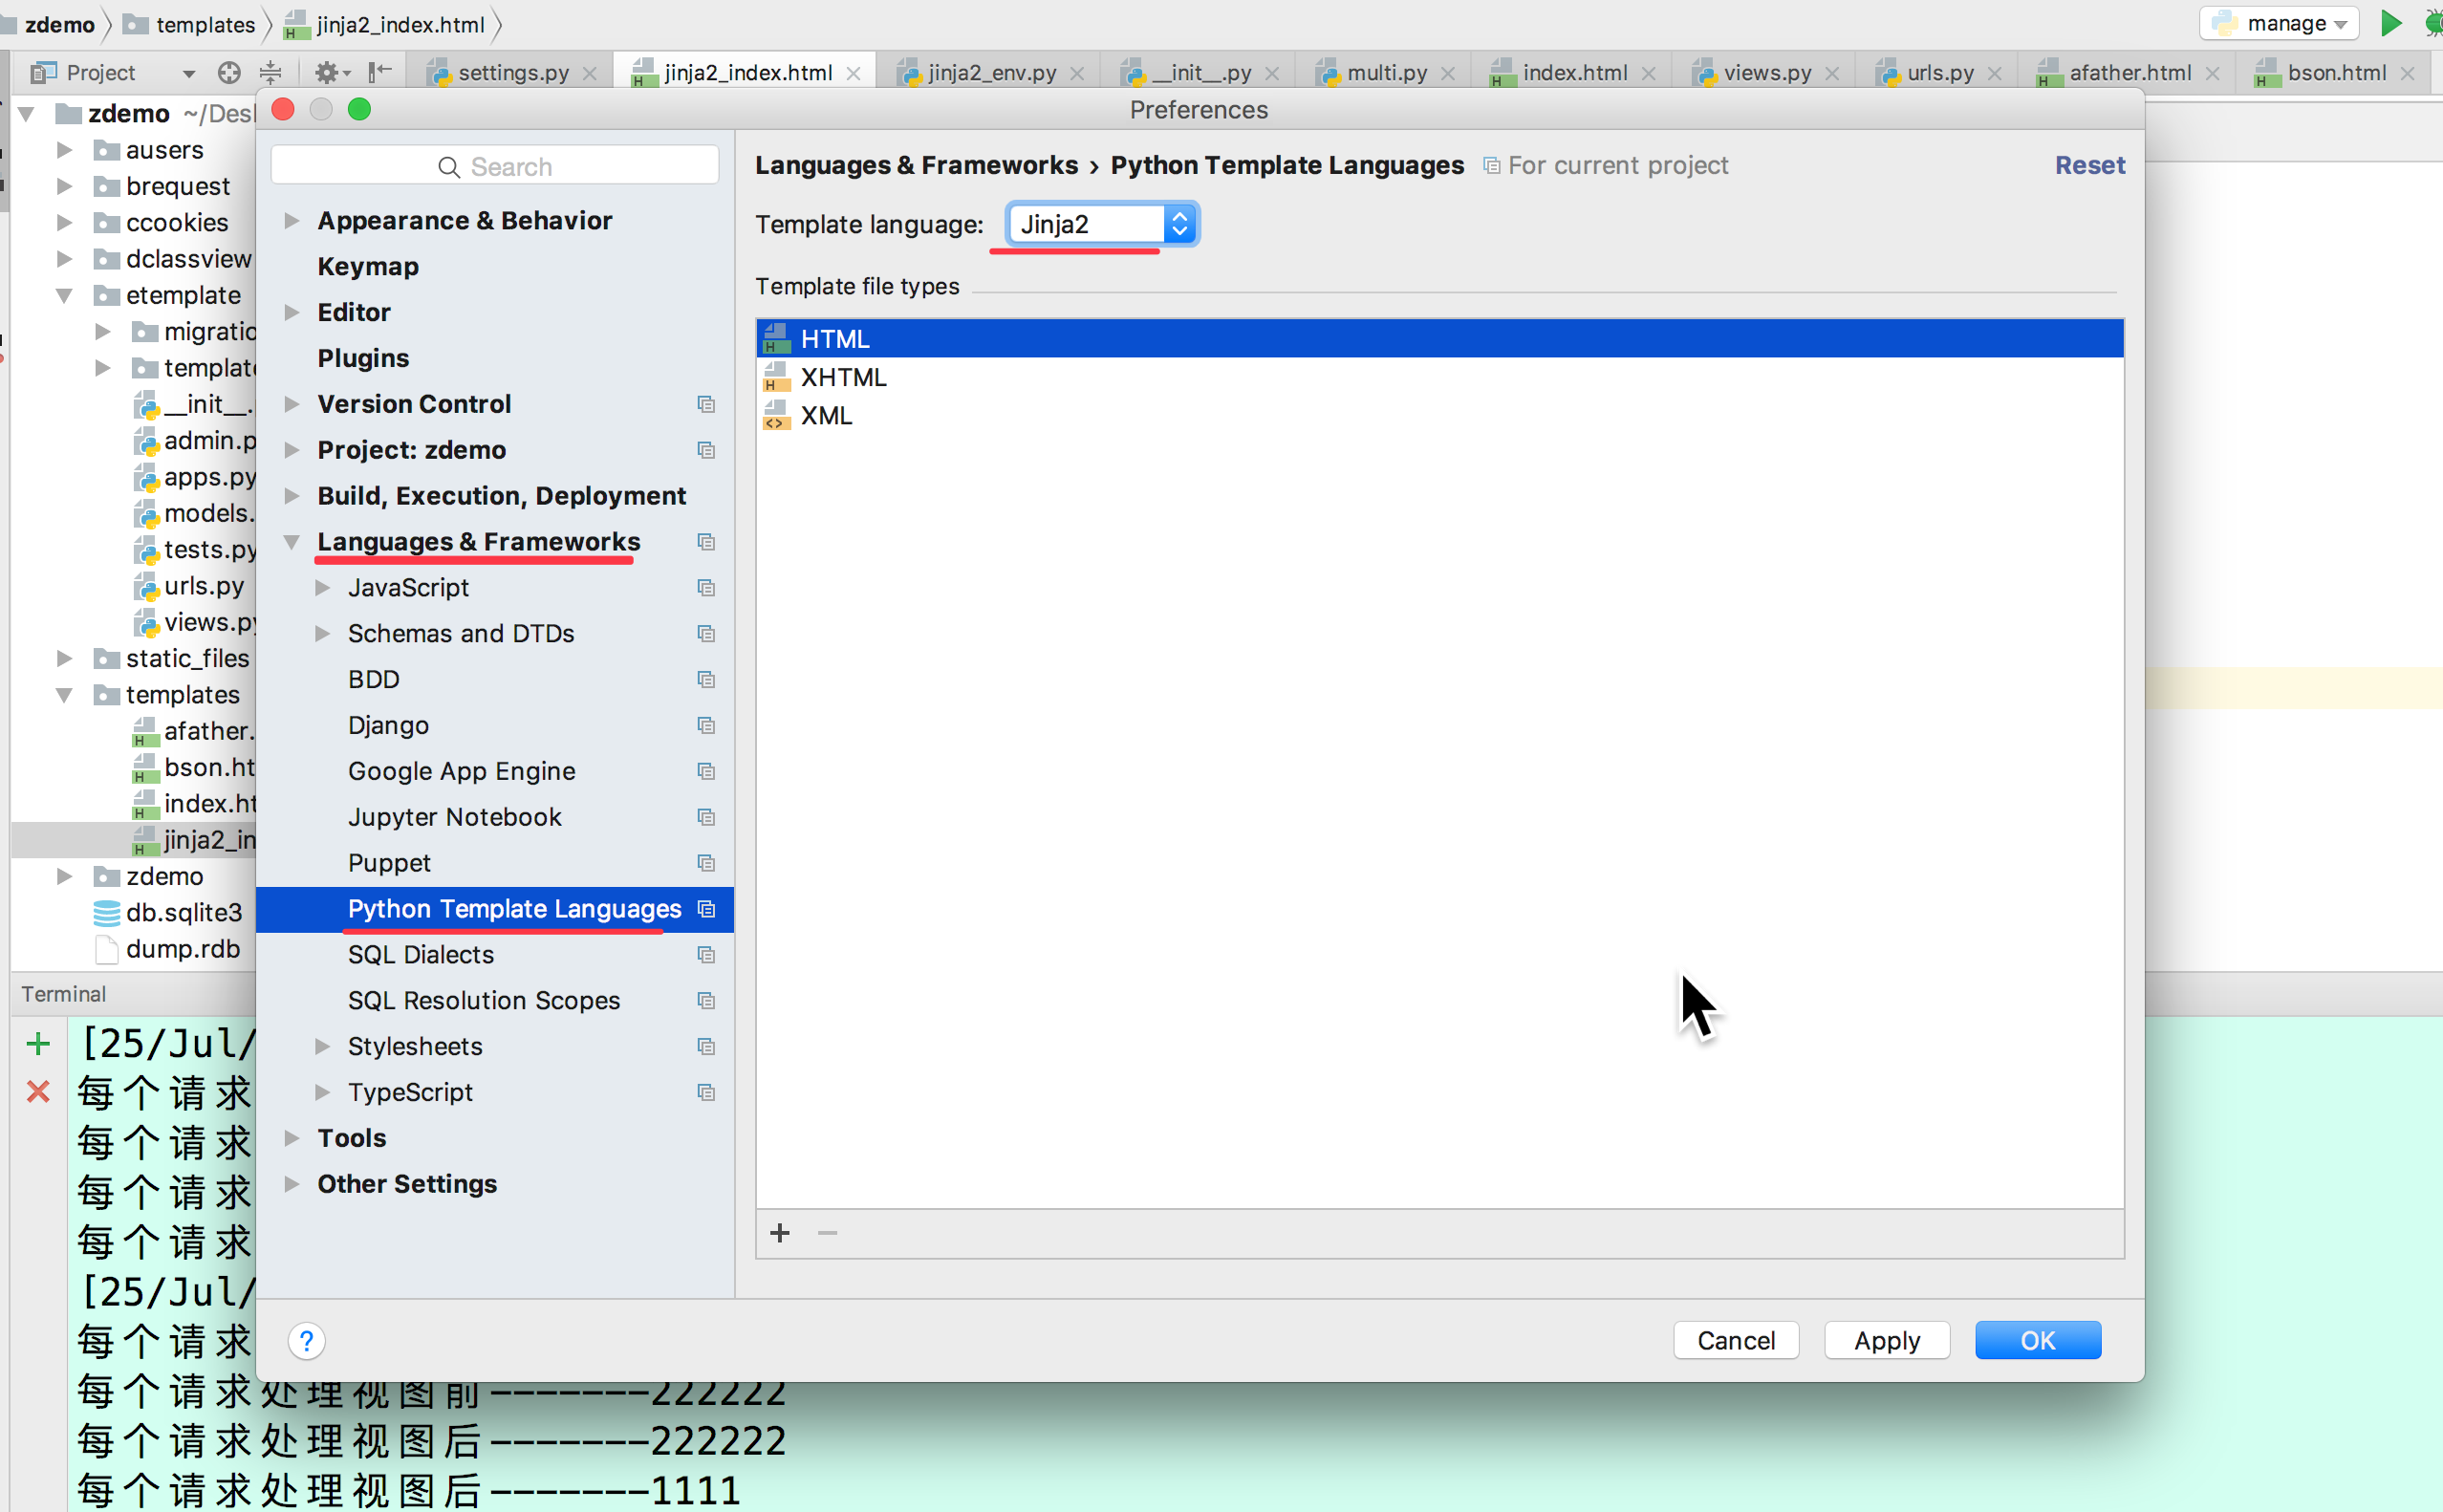

## postman使用说明

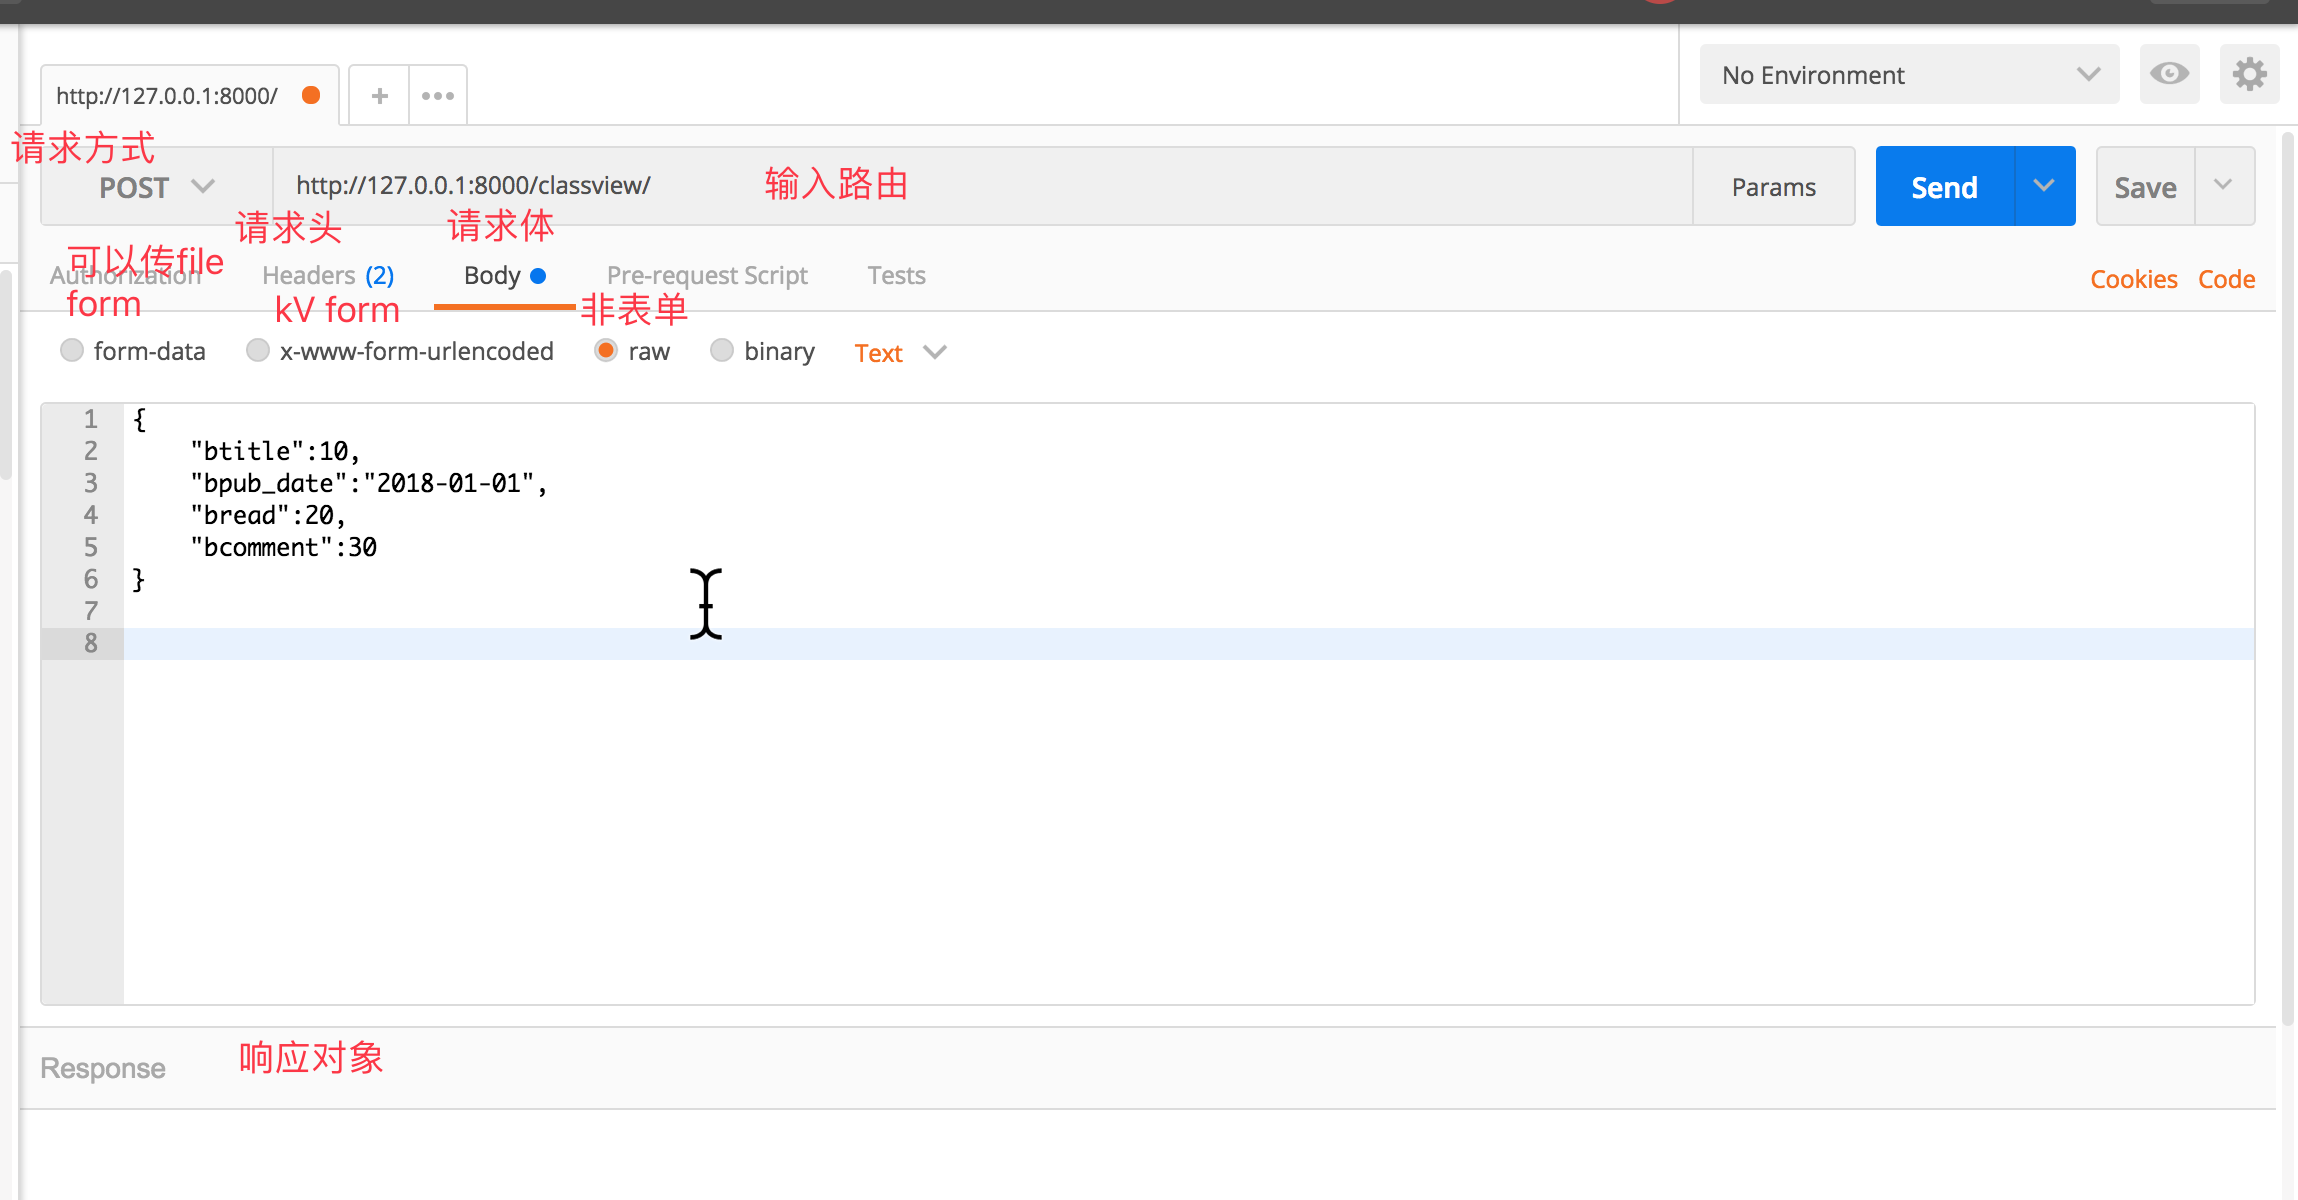

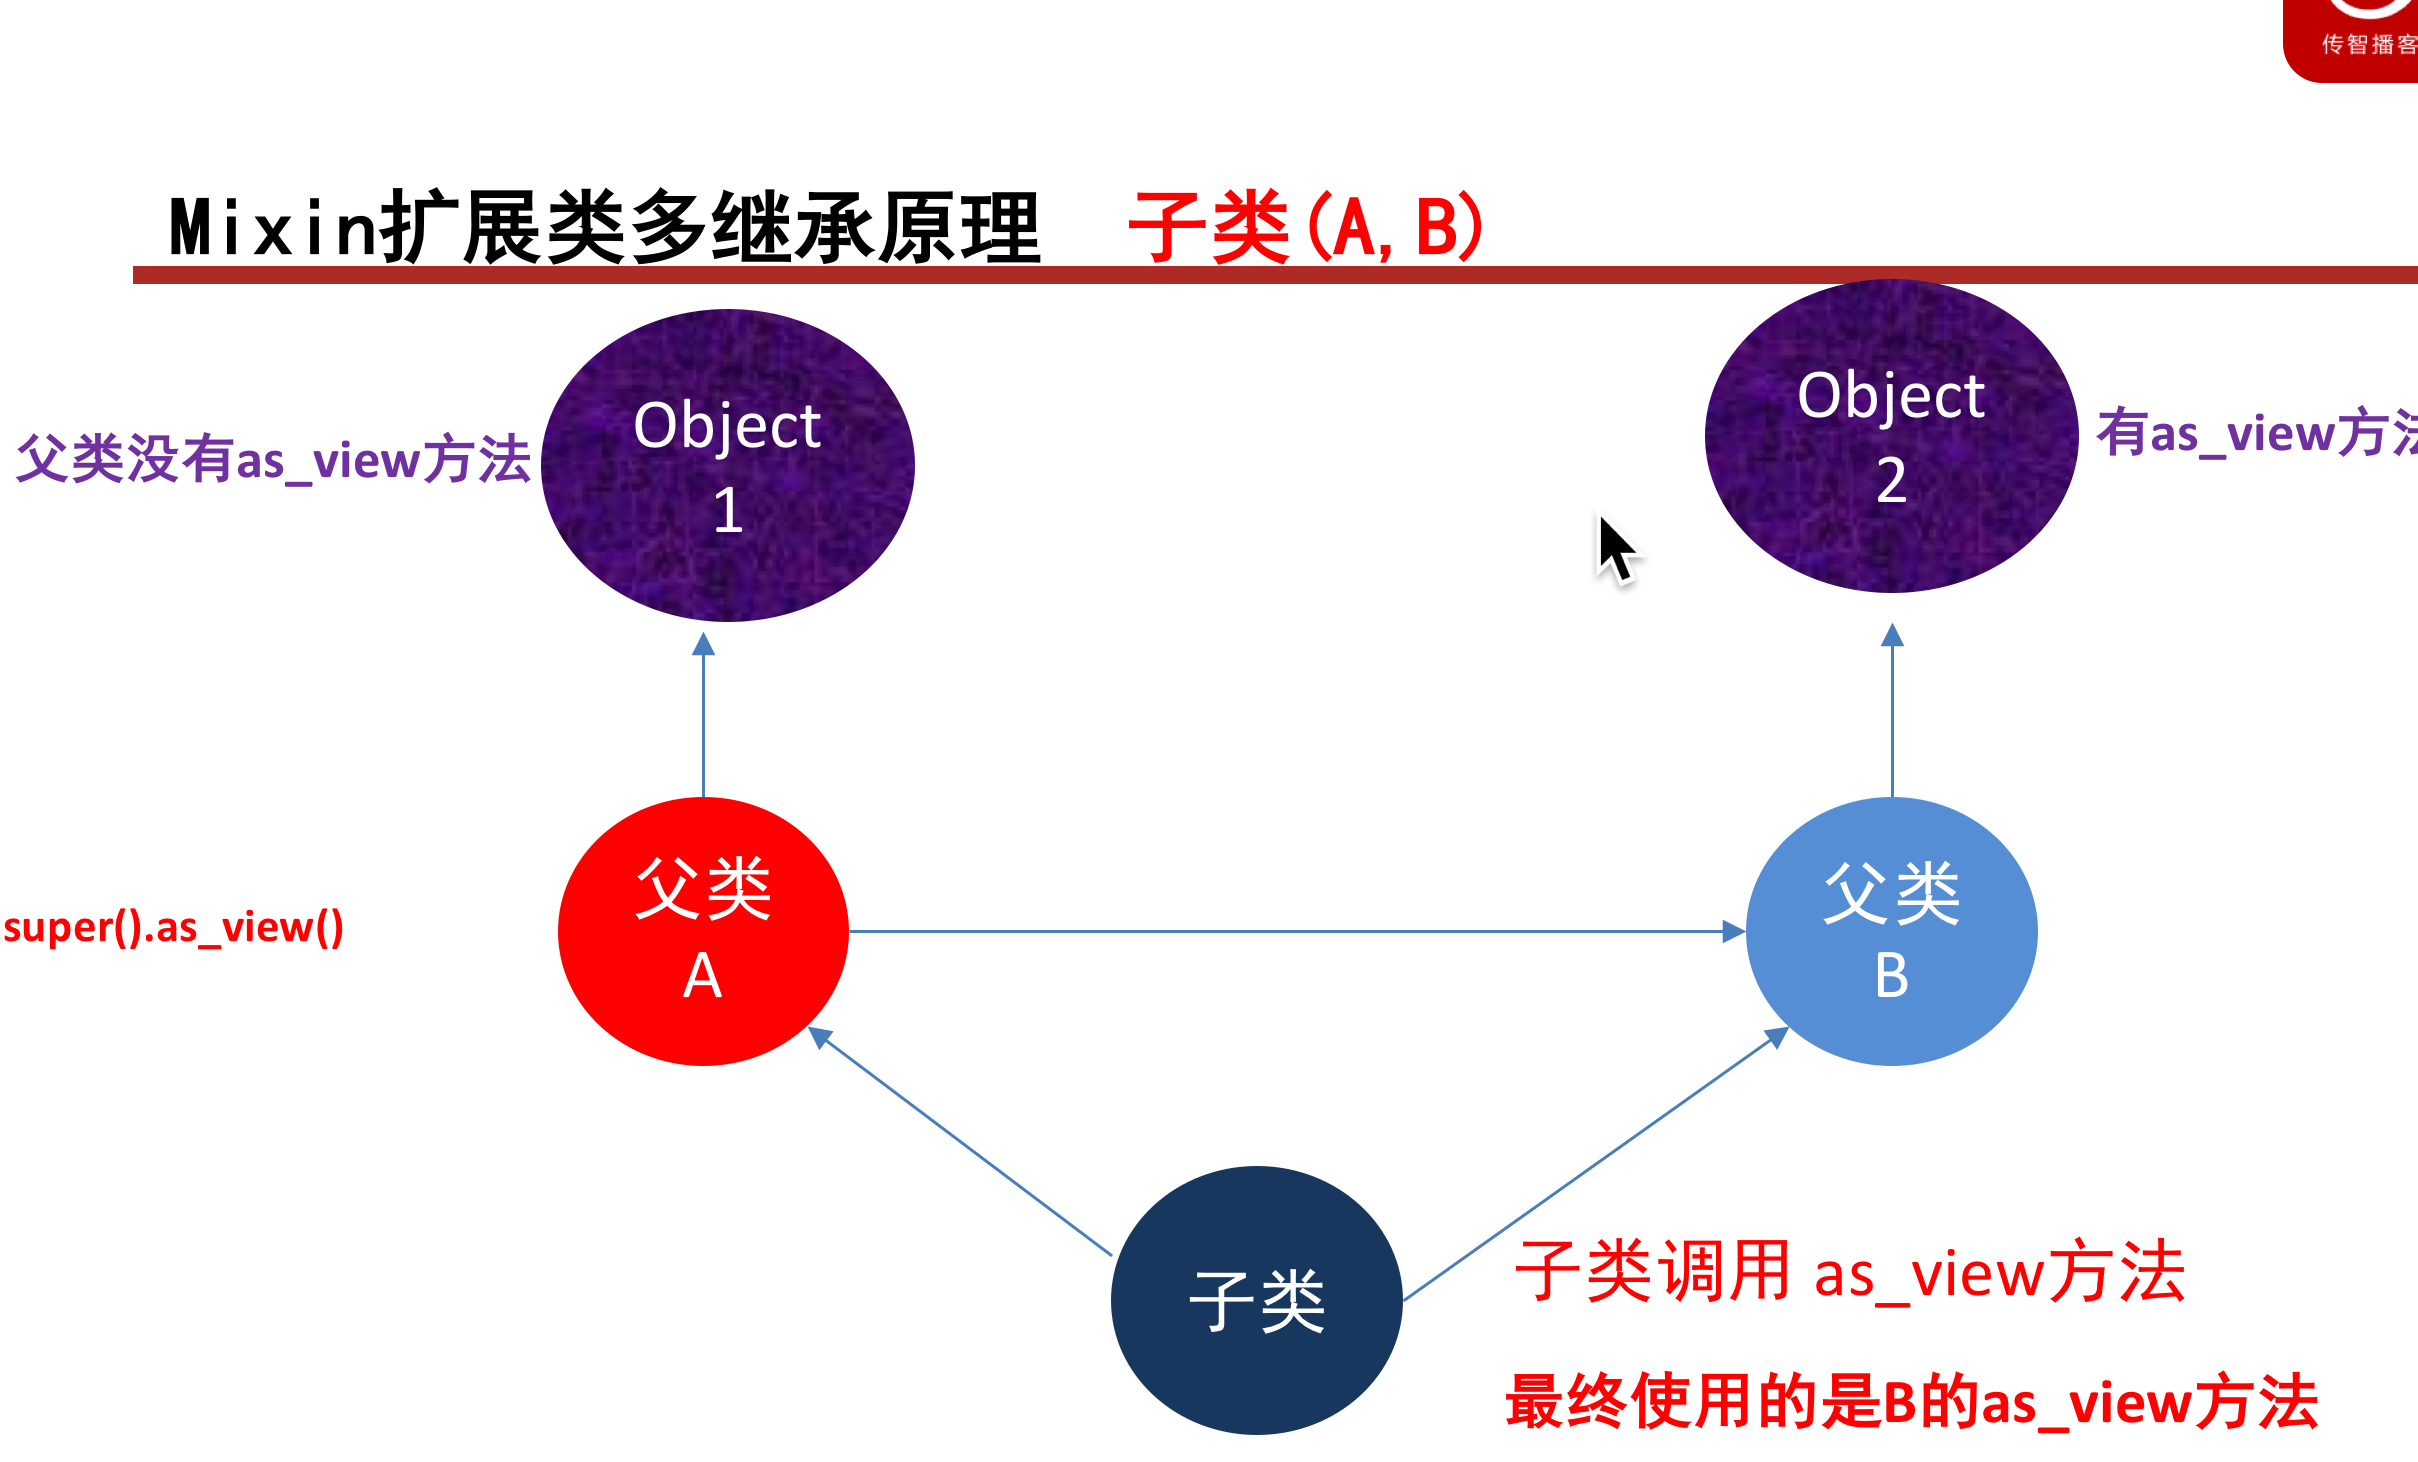

# cookies实现

```python

from django.conf.urls import url, include
from django.contrib import admin

urlpatterns = [
    url(r'^admin/', admin.site.urls),

    # 总路由--子路由---视图函数
    url(r'^router/', include('arouter.urls', namespace="arouter")),

    # 总路由--子路由---视图函数
    # r'^' 匹配所有路由
    url(r'^', include('bresponse.urls')),

    # 解析4中传参
    url(r'^', include('crequest.urls')),

    # 解cookie
    url(r'^', include('dcookie.urls')),

    # session
    url(r'^', include('esession.urls')),

    # 类视图
    url(r'^', include('fclassview.urls')),
]



# 配置主路由
from django.conf.urls import url, include
from django.contrib import admin

urlpatterns = [
    url(r'^admin/', admin.site.urls),

    # 解cookie
    url(r'^', include('dcookie.urls')),

    # session
    url(r'^', include('esession.urls')),
]

# 配置子路由
from django.conf.urls import url
from . import views

urlpatterns = [
    url(r'^cookie/$', views.index)，
]


# 定义视图函数

from django.http import HttpResponse
from django.shortcuts import render


# 定义视图函数
def index(request):
    # 1. 设置cookie  --->reponse.set_cookie(k,v,max_age)
    response = HttpResponse('操作cookie')
    # response.set_cookie('itcast','heima')
    # response.set_cookie('itcast', 'heima', max_age=600)

    # 2. 读取cookie  --->request.COOKIES
    print(request.COOKIES.get('itcast'))

    # 3. 删除cookie  --->response.delete_cookie(k)
    response.delete_cookie('itcast')

    return response
```

# request 请求对象

```python

# 配置主路由
from django.conf.urls import url, include
from django.contrib import admin

urlpatterns = [
    url(r'^admin/', admin.site.urls),

    # 总路由--子路由---视图函数
    url(r'^router/', include('arouter.urls', namespace="arouter")),

    # 总路由--子路由---视图函数
    # r'^' 匹配所有路由
    url(r'^', include('bresponse.urls')),

    # 解析4中传参
    url(r'^', include('crequest.urls')),

    # 解cookie
    url(r'^', include('dcookie.urls')),

    # session
    url(r'^', include('esession.urls')),

    # 类视图
    url(r'^', include('fclassview.urls')),
]


# 配置子路由

from django.conf.urls import url
from . import views


urlpatterns = [
    #1.路径传参    --/9012/beijing/----->正则解析
    #url(r'^request/(\d{4})/(\w+)/$', views.paramsParse),
    url(r'^request/(?P<year>\d{4})/(?P<city>\w+)/$', views.paramsParse),
]

# 视图函数

from django.http import HttpResponse
from django.shortcuts import render
import json

def paramsParse(request, city, year):

    # Request其他属性
    print('请求方式:',request.method)
    print('用户:', request.user)
    print('编码:', request.encoding)
    print('路径:', request.path)

    # 4.请求头参数 -- request.META--dict
    request_header = request.META
    # print(request.META)
    # print(request.META['itcast'])
    #print(request.META.get('itcast'))

    print(request.META.get('HTTP_ITCAST'))

    # 3.请求体参数  3.2 非表单传参form request.body==>bytes-->decode()
    # not_from_data = request.body
    # print(not_from_data)
    # print(not_from_data.decode())
    # not_form_data_dict = json.loads(not_from_data.decode()) # not_form_data_dict = eval(not_form_data.decode)
    # print(not_form_data_dict)
    # print(type(not_form_data_dict))


    # 3.请求体参数  3.1 表单传参form -- ===>QueryDict:
    # form_data = request.POST
    # print(form_data)
    # print(form_data.get('form_b'))
    # print(form_data.getlist('form_a'))


    # 2.解析 查询参数  ?a=10 ==> QueryDict:
    # parmas = request.GET
    # print(parmas)
    # print(parmas.get('a'))
    # print(parmas.get('b'))
    # print(parmas.getlist('a'))




    # 1.接收 正则已经解析完毕的 路径参数
    # print("年份:", year)
    # print("城市:", city)


    return HttpResponse('#1..解析 查询参数  ?a=10')

```

# 操作session

```python


# 在settings.py文件 配置redis数据库（最后）
# 1.静态路由
STATIC_URL = '/static/'

# 2. 静态文件夹
STATICFILES_DIRS=[os.path.join(BASE_DIR, 'static_files')]


# 配置redis存储 session
CACHES = {
    "default": {
        "BACKEND": "django_redis.cache.RedisCache",
        # 千万注意 笔记里面是 默认1号 不是0号
        "LOCATION": "redis://127.0.0.1:6379/1",
        "OPTIONS": {
            "CLIENT_CLASS": "django_redis.client.DefaultClient",
        }
    }
}
SESSION_ENGINE = "django.contrib.sessions.backends.cache"
SESSION_CACHE_ALIAS = "default"


# 配置主路由
from django.conf.urls import url, include
from django.contrib import admin

urlpatterns = [
    url(r'^admin/', admin.site.urls),

    # 总路由--子路由---视图函数
    url(r'^router/', include('arouter.urls', namespace="arouter")),

    # 总路由--子路由---视图函数
    # r'^' 匹配所有路由
    url(r'^', include('bresponse.urls')),

    # 解析4中传参
    url(r'^', include('crequest.urls')),

    # 解cookie
    url(r'^', include('dcookie.urls')),

    # session
    url(r'^', include('esession.urls')),

    # 类视图
    url(r'^', include('fclassview.urls')),
]


# 配置子路由

from django.conf.urls import url
from . import views


urlpatterns = [
    url(r'^session/$', views.index)
]


# 配置视图函数

from django.http import HttpResponse
from django.shortcuts import render


# Create your views here.
# 定义视图函数
def index(request):
    # 1.设置 默认是None==14天
    # request.session['sesssion_itcast'] = 'heima'
    # request.session['AAA'] = '666'
    # request.session['BBB'] = '888'
    # request.session.set_expiry(24 * 30 * 3600)

    # 2.读取
    print(request.session['sesssion_itcast'] )

    # 3.清除 整条session
    # request.session.flush()

    # 4. 删除 指定的 session k
    # del request.session['AAA']

    # 5. 删除 所有的 session K
    request.session.clear()

    return HttpResponse('操作session')


```

# 类视图

```python


# 配置主路由
from django.conf.urls import url, include
from django.contrib import admin

urlpatterns = [
    url(r'^admin/', admin.site.urls),
    # 类视图
    url(r'^', include('fclassview.urls')),
]


# 配置子路由
from django.conf.urls import url

from fclassview.views import my_decorator
from . import views

urlpatterns = [
    # 子路由--视图函数
    # url(r'^classview/$', views.index),
    # 子路由-类视图-视图函数
    #url(r'^classview/$', my_decorator(views.LoginView.as_view())),
    url(r'^classview/$', views.LoginView.as_view()),
]


# 定义视图函数
from django.http import HttpResponse
from django.shortcuts import render

from django.views import View
from django.utils.decorators import method_decorator


# 1.装饰器的定义
def my_decorator(func):
    def wrapper(request, **kwargs):
        print('添加了装饰器----', request.method)
        return func(request, **kwargs)

    return wrapper



# 类视图
# @method_decorator(my_decorator, name="get")
# @method_decorator(my_decorator, name="dispatch")
class LoginView(View):
    # @method_decorator(my_decorator)
    def get(self, request):
        # 处理GET请求，返回注册页面
        return HttpResponse('登录页面显示-method_decorator-LoginView---' + request.method)

    def post(self, request):
        return HttpResponse('登录功能-method_decorator-LoginView---' + request.method)

        # 类视图的 对象方法函数 必须是请求方式名字
        # def abc(self,request):
        #     return HttpResponse('登录功能--abc---' + request.method)


# 视图函数
def index(request):
    # 获取请求方法，判断是GET/POST请求
    if request.method == 'GET':
        # 处理GET请求，返回注册页面
        return HttpResponse('登录页面显示-----' + request.method)
    else:
        # 处理POST请求，实现注册逻辑
        return HttpResponse('登录功能-----' + request.method)

```